In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/home/seankim902/Downloads/caffe-master/'  # this file is expected to be in {caffe_root}/examples
import sys
import os
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = os.path.join(caffe_root,'models/bvlc_reference_caffenet/deploy.prototxt')
PRETRAINED = os.path.join(caffe_root,'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel')
IMAGE_FILE = os.path.join(caffe_root,'examples/images/cat.jpg')

import os
if not os.path.isfile(PRETRAINED):
    print("Downloading pre-trained CaffeNet model...")
    !../scripts/download_model_binary.py ../models/bvlc_reference_caffenet

In [8]:
caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

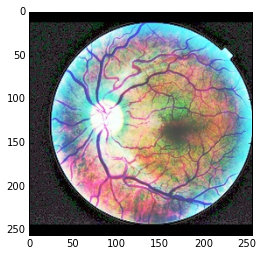

In [9]:
input_image = caffe.io.load_image("/home/seankim902/mydata/val/140_left.jpeg")
#input_image = caffe.io.load_image("/home/seankim902/Downloads/mk.jpg")


plt.imshow(input_image)

prediction shape: (1000,)
predicted class: 868


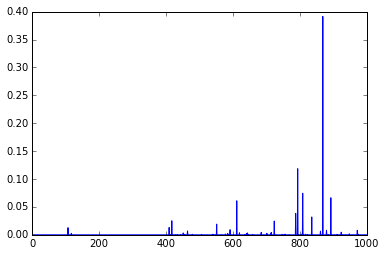

In [10]:
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
print 'predicted class:', prediction[0].argmax()

In [90]:
prediction[0]

array([  1.51345192e-09,   6.71417322e-09,   2.88921465e-09,
         4.49157322e-10,   9.04753072e-09,   9.60389368e-09,
         6.84582080e-09,   1.45347601e-08,   2.56982946e-09,
         1.91259586e-09,   2.84688428e-09,   1.00473496e-08,
         9.29302217e-08,   2.21421237e-09,   5.52366082e-08,
         8.65396466e-09,   8.50828574e-10,   1.27134587e-08,
         2.38364439e-08,   4.17565449e-09,   3.20212301e-10,
         3.58449881e-10,   6.07302386e-09,   1.03083975e-09,
         1.06812226e-09,   7.11727288e-10,   5.89597982e-10,
         4.80683848e-09,   1.02594644e-09,   7.40917860e-09,
         2.16291030e-09,   2.36666187e-10,   3.65428354e-10,
         5.27030530e-10,   9.50955226e-09,   3.86706583e-10,
         1.56694799e-08,   1.13402643e-09,   2.33326636e-10,
         6.76147627e-09,   1.49726065e-09,   9.05825914e-10,
         1.21716803e-09,   1.76939441e-09,   2.30130337e-09,
         1.09364553e-08,   3.47839046e-09,   2.88369439e-09,
         2.45445414e-10,

In [22]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [56]:
caffe.set_mode_cpu()
net = caffe.Net(caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt',
                caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
                caffe.TEST)

# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [57]:
net.blobs['data'].reshape(1,3,227,227)
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image("/home/seankim902/mydata/train/18345_left.jpeg"))
out = net.forward()
print("Predicted class is #{}.".format(out['prob'].argmax()))

Predicted class is #117.


In [9]:
net=caffe.Classifier(MODEL_FILE, PRETRAINED,mean=np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [10]:
caffe.set_mode_cpu()

In [12]:
import skimage

In [11]:
def get_feature(x, net):
    try:
        print x
        #image = skimage.img_as_float((x))
        #image = net.preprocess('data', image)
        net.blobs['data'].reshape(1,3,227,227)
        net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(x))
        net.forward()
        return net.blobs['fc7'].data[0].flatten()
    except:
        print 'except'
        return []

In [13]:
def process_image(fn, image_path, net):
    image_file_path = os.path.join(image_path, fn)
    return get_feature(image_file_path, net)

In [38]:
import pandas as pd
data_file = os.path.join('/home/seankim902/Downloads/caffe-master/data', 'dr', 'val.txt')
data= pd.read_table(data_file, header=None, sep=' ', comment='#')
data.columns = ['filename', 'class']
data['feature'] = data['filename'].map(lambda fn: process_image(fn, '/home/seankim902/mydata/val', net))
data.to_pickle(os.path.join('/home/seankim902/Downloads/caffe-master/data', 'feature.pickle'))

/home/seankim902/mydata/val/10_left.jpeg
/home/seankim902/mydata/val/10_right.jpeg
/home/seankim902/mydata/val/13_left.jpeg
/home/seankim902/mydata/val/13_right.jpeg
/home/seankim902/mydata/val/15_left.jpeg
/home/seankim902/mydata/val/15_right.jpeg
/home/seankim902/mydata/val/16_left.jpeg
/home/seankim902/mydata/val/16_right.jpeg
/home/seankim902/mydata/val/17_left.jpeg
/home/seankim902/mydata/val/17_right.jpeg
/home/seankim902/mydata/val/19_left.jpeg
/home/seankim902/mydata/val/19_right.jpeg
/home/seankim902/mydata/val/20_left.jpeg
/home/seankim902/mydata/val/20_right.jpeg
/home/seankim902/mydata/val/21_left.jpeg
/home/seankim902/mydata/val/21_right.jpeg
/home/seankim902/mydata/val/22_left.jpeg
/home/seankim902/mydata/val/22_right.jpeg
/home/seankim902/mydata/val/23_left.jpeg
/home/seankim902/mydata/val/23_right.jpeg
/home/seankim902/mydata/val/25_left.jpeg
/home/seankim902/mydata/val/25_right.jpeg
/home/seankim902/mydata/val/30_left.jpeg
/home/seankim902/mydata/val/30_right.jpeg
/hom

In [39]:
#2. train
from sklearn import svm, grid_search
from sklearn import cross_validation
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import os
import cPickle

data = pd.read_pickle(os.path.join('/home/seankim902/Downloads/caffe-master/data', 'feature.pickle'))
data = data[data['feature'].map(lambda x: len(x) > 4000)]
X = np.array(data['feature'].tolist())
y = data['class'].values
images = data['filename'].values

param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


clf = grid_search.GridSearchCV(svm.SVC(), param_grid, verbose=10)
clf.fit(X, y)

with open('best_estimator', 'wb') as f:
    cPickle.dump(clf.best_estimator_, f)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] kernel=linear, C=0.01 ...........................................
[CV] .................. kernel=linear, C=0.01, score=0.680443 -  28.1s
[CV] kernel=linear, C=0.01 ...........................................
[CV] .................. kernel=linear, C=0.01, score=0.653137 -  28.0s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   28.2s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:   56.1s



[CV] kernel=linear, C=0.01 ...........................................
[CV] .................. kernel=linear, C=0.01, score=0.664449 -  27.8s
[CV] kernel=linear, C=0.1 ............................................
[CV] ................... kernel=linear, C=0.1, score=0.638376 -  39.2s
[CV] kernel=linear, C=0.1 ............................................
[CV] ................... kernel=linear, C=0.1, score=0.616236 -  39.0s
[CV] kernel=linear, C=0.1 ............................................
[CV] ................... kernel=linear, C=0.1, score=0.606800 -  33.9s
[CV] kernel=linear, C=1 ..............................................
[CV] ..................... kernel=linear, C=1, score=0.638376 -  39.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ..................... kernel=linear, C=1, score=0.610332 -  39.0s

[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done   8 jobs       | elapsed:  4.6min



[CV] kernel=linear, C=1 ..............................................
[CV] ..................... kernel=linear, C=1, score=0.606800 -  33.9s
[CV] kernel=linear, C=10 .............................................
[CV] .................... kernel=linear, C=10, score=0.638376 -  39.4s
[CV] kernel=linear, C=10 .............................................
[CV] .................... kernel=linear, C=10, score=0.610332 -  39.0s
[CV] kernel=linear, C=10 .............................................
[CV] .................... kernel=linear, C=10, score=0.606800 -  33.9s
[CV] kernel=linear, C=100 ............................................
[CV] ................... kernel=linear, C=100, score=0.638376 -  38.4s
[CV] kernel=linear, C=100 ............................................
[CV] ................... kernel=linear, C=100, score=0.610332 -  39.1s
[CV] kernel=linear, C=100 ............................................
[CV] ................... kernel=linear, C=100, score=0.606800 -  34.1s
[CV] 

[Parallel(n_jobs=1)]: Done  13 jobs       | elapsed:  7.6min
[Parallel(n_jobs=1)]: Done  18 jobs       | elapsed: 10.7min



[CV] kernel=rbf, C=0.01, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=0.01, gamma=0.001, score=0.738007 -  40.4s
[CV] kernel=rbf, C=0.01, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=0.01, gamma=0.001, score=0.738007 -  40.3s
[CV] kernel=rbf, C=0.01, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=0.01, gamma=0.001, score=0.738359 -  40.5s
[CV] kernel=rbf, C=0.01, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=0.01, gamma=0.0001, score=0.738007 -  28.2s
[CV] kernel=rbf, C=0.01, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=0.01, gamma=0.0001, score=0.738007 -  28.3s
[CV] kernel=rbf, C=0.01, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=0.01, gamma=0.0001, score=0.738359 -  28.1s
[CV] kernel=rbf, C=0.1, gamma=0.001 ..................................
[CV] ......... kernel=rbf, C=0.1, gamma=0.001, score=0.738007 -  40.7s
[CV] 

[Parallel(n_jobs=1)]: Done  25 jobs       | elapsed: 14.8min
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed: 19.1min



[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV] ........... kernel=rbf, C=1, gamma=0.001, score=0.742794 -  41.4s
[CV] kernel=rbf, C=1, gamma=0.0001 ...................................
[CV] .......... kernel=rbf, C=1, gamma=0.0001, score=0.738007 -  30.7s
[CV] kernel=rbf, C=1, gamma=0.0001 ...................................
[CV] .......... kernel=rbf, C=1, gamma=0.0001, score=0.738007 -  30.9s
[CV] kernel=rbf, C=1, gamma=0.0001 ...................................
[CV] .......... kernel=rbf, C=1, gamma=0.0001, score=0.738359 -  31.8s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[CV] .......... kernel=rbf, C=10, gamma=0.001, score=0.743173 -  44.0s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[CV] .......... kernel=rbf, C=10, gamma=0.001, score=0.741697 -  43.9s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[CV] .......... kernel=rbf, C=10, gamma=0.001, score=0.736142 -  44.0s
[CV] 

[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed: 24.6min
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed: 30.8min



[CV] kernel=rbf, C=1000, gamma=0.001 .................................
[CV] ........ kernel=rbf, C=1000, gamma=0.001, score=0.736142 -  43.9s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=1000, gamma=0.0001, score=0.685609 -  39.0s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=1000, gamma=0.0001, score=0.667897 -  39.7s
[CV] kernel=rbf, C=1000, gamma=0.0001 ................................
[CV] ....... kernel=rbf, C=1000, gamma=0.0001, score=0.668884 -  39.1s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 33.5min finished


In [41]:
cv = cross_validation.ShuffleSplit(len(y), n_iter=1, test_size=0.2)
for train, test in cv:
    train_X = X[train]
    train_y = y[train]

    test_X = X[test]
    test_y = y[test]
    test_image = images[test]
    clf = SVC(C=10, gamma=0.0001, kernel='rbf', random_state=None)
    clf.fit(train_X, train_y)

result = clf.predict(test_X)
no = test_image[result == 0]
yes = test_image[result == 1]

result_df = pd.DataFrame({'image':test_image})
result_df['class'] = result
result_df.to_pickle(os.path.join('/home/seankim902/Downloads/caffe-master/data', 'result.pickle'))

In [46]:
result_data = pd.read_pickle(os.path.join('/home/seankim902/Downloads/caffe-master/data', 'result.pickle'))
class_0 = result_data[result_data['class'] == 0]
class_1 = result_data[result_data['class'] == 1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [43]:
class_0 = result_data[result_data['class'] == 0]
class_1 = result_data[result_data['class'] == 1]

In [44]:
class_0

,image,class
0,3575_right.jpeg,0
1,625_left.jpeg,0
2,2339_right.jpeg,0
3,2880_right.jpeg,0
4,3748_left.jpeg,0
5,1334_right.jpeg,0
6,563_right.jpeg,0
7,1732_right.jpeg,0
8,4657_right.jpeg,0
9,1093_right.jpeg,0


In [14]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

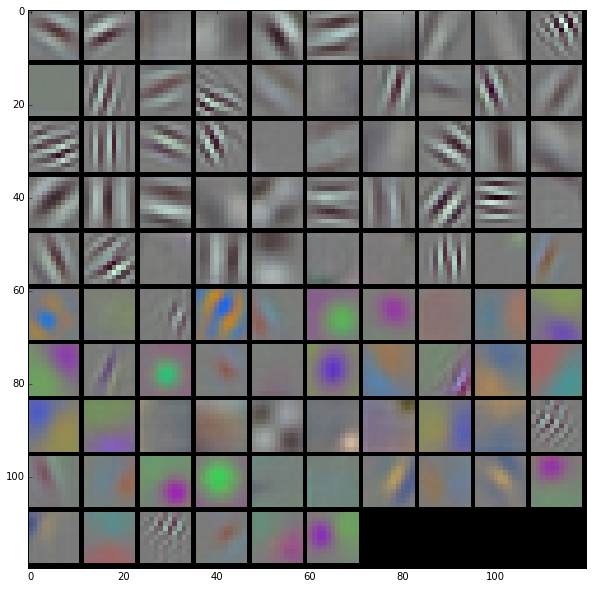

In [30]:
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

In [35]:
net.params['conv1'][0].data

array([[[[ 0.47969946,  0.48543242,  0.48990154, ...,  0.42913333,
           0.43822116,  0.45464516],
         [ 0.47929496,  0.48430488,  0.49765861, ...,  0.46793696,
           0.46454549,  0.46582621],
         [ 0.45951751,  0.45588815,  0.44544801, ...,  0.5651843 ,
           0.51602674,  0.4959546 ],
         ..., 
         [ 0.48552442,  0.47902256,  0.46339497, ...,  0.49608213,
           0.47788724,  0.48080152],
         [ 0.48336738,  0.48638105,  0.4883244 , ...,  0.49691573,
           0.48101076,  0.46287611],
         [ 0.48019966,  0.47462961,  0.47454968, ...,  0.49697354,
           0.49191892,  0.46850389]],

        [[ 0.47261137,  0.4977999 ,  0.5076825 , ...,  0.43205562,
           0.4349426 ,  0.4503884 ],
         [ 0.46152264,  0.46300632,  0.48351505, ...,  0.4942438 ,
           0.47763056,  0.46992165],
         [ 0.43944284,  0.41866922,  0.39805654, ...,  0.6275869 ,
           0.56268299,  0.52361441],
         ..., 
         [ 0.49954408,  0.489365

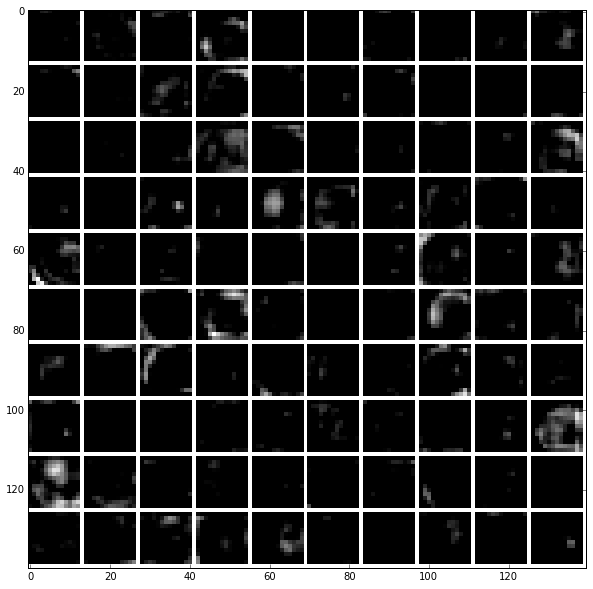

In [27]:
feat = net.blobs['conv5'].data[0, :100]
vis_square(feat, padval=1)

In [21]:
feat = net.blobs['conv6'].data[0, :100]
vis_square(feat, padval=1)

KeyError: 'conv6'

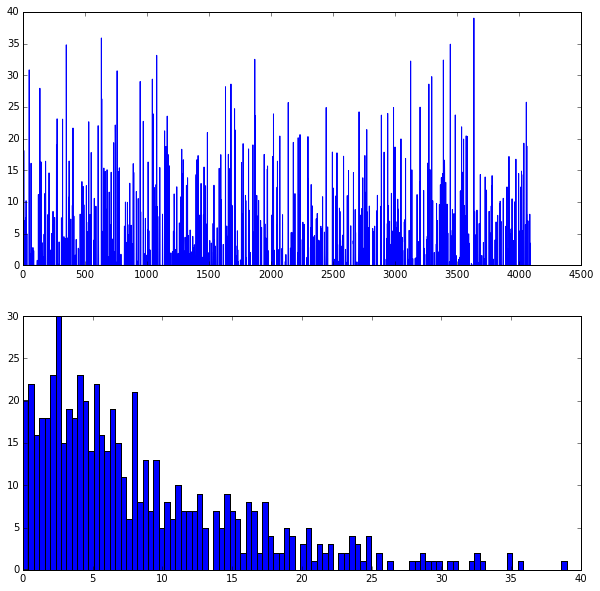

In [65]:
feat = net.blobs['fc6'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

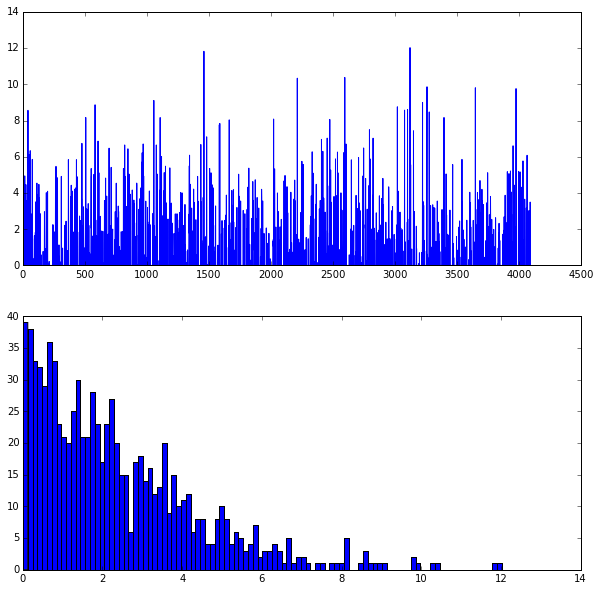

In [66]:
feat = net.blobs['fc7'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

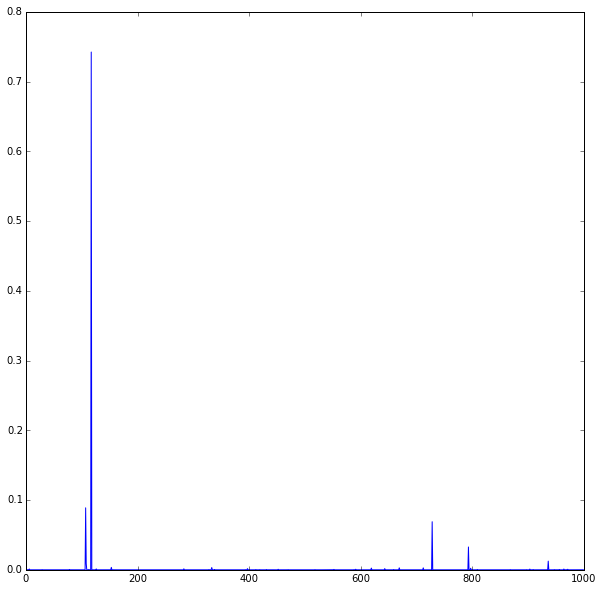

In [67]:
feat = net.blobs['prob'].data[0]
plt.plot(feat.flat)

In [5]:
#2. train
from sklearn import svm, grid_search
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import os
import cPickle

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'oob_score': [True, False]
}

data = pd.read_pickle(os.path.join('/home/seankim902/Downloads/caffe-master/data', 'feature.pickle'))
data = data[data['feature'].map(lambda x: len(x) > 4000)]
X = np.array(data['feature'].tolist())
y = data['class'].values
images = data['filename'].values



clf = grid_search.GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, verbose=3)
clf.fit(X, y)

with open('best_estimator', 'wb') as f:
    cPickle.dump(clf.best_estimator_, f)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] oob_score=True, criterion=gini, max_depth=None ..................
[CV]  oob_score=True, criterion=gini, max_depth=None, score=0.738007 -   8.3s
[CV] oob_score=True, criterion=gini, max_depth=None ..................
[CV]  oob_score=True, criterion=gini, max_depth=None, score=0.741697 -   8.4s
[CV] oob_score=True, criterion=gini, max_depth=None ..................
[CV]  oob_score=True, criterion=gini, max_depth=None, score=0.738359 -   8.1s
[CV] oob_score=False, criterion=gini, max_depth=None .................
[CV]  oob_score=False, criterion=gini, max_depth=None, score=0.736531 -   5.3s
[CV] oob_score=False, criterion=gini, max_depth=None .................
[CV]  oob_score=False, criterion=gini, max_depth=None, score=0.735055 -   5.1s
[CV] oob_score=False, criterion=gini, max_depth=None .................
[CV]  oob_score=False, criterion=gini, max_depth=None, score=0.744272 -   4.8s
[CV] oob_score=True, criterion=gini, max_de

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.8min finished
